In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
style.use("ggplot")
import seaborn as sns
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [5]:
df = pd.read_csv("/content/amazon_alexa.tsv" , sep = '\t')
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3149 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


<ipython-input-12-c3acfd74ecba>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=df, palette=colors)


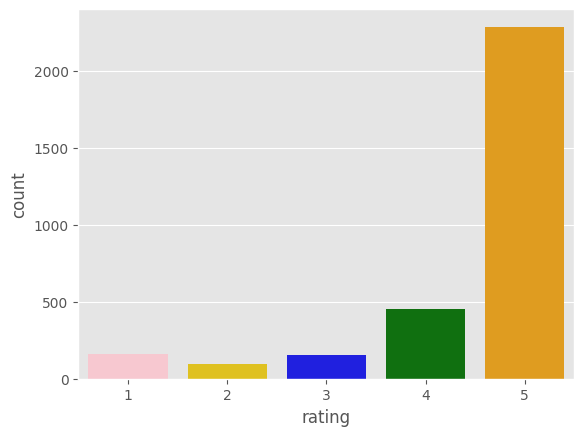

In [12]:
sns.countplot(x='rating', data=df, palette=colors)
plt.show()

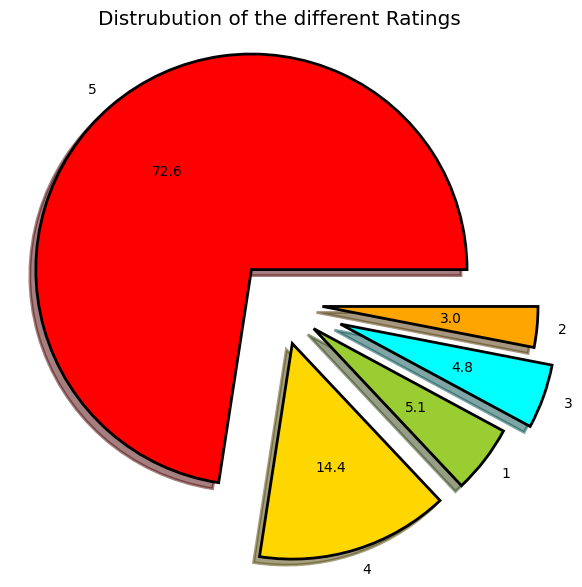

In [9]:
fig = plt.figure(figsize = (7,7))
colors = ('red', 'gold','yellowgreen','cyan','orange')
wp = {'linewidth': 2, 'edgecolor':'black'}
tags = df['rating'].value_counts()
explode = (0.2,0.2,0.2,0.3,0.2)
tags.plot(kind ='pie', autopct = '%1.1f',colors = colors, shadow = True,
          startangle =0, wedgeprops =wp, explode = explode, label ='')
plt.title('Distrubution of the different Ratings')
plt.show()

<ipython-input-17-33cbf1999b34>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='variation', data = df, palette='bright')


<Axes: xlabel='variation', ylabel='count'>

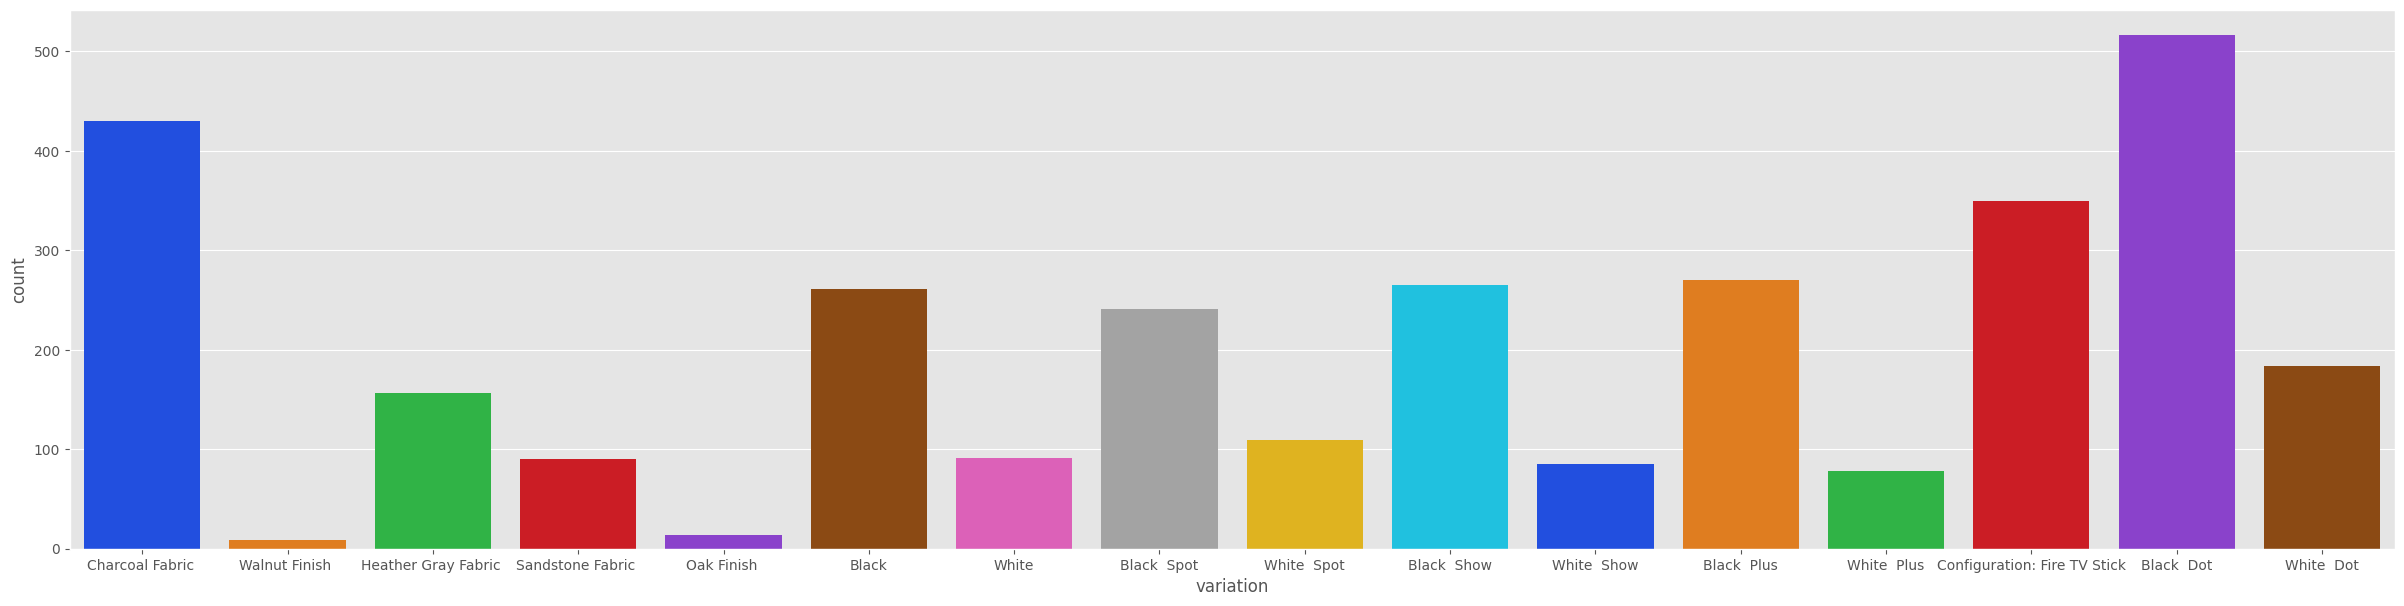

In [17]:
fig = plt.figure(figsize = (30,7))
sns.countplot(x='variation', data = df, palette='bright')

In [18]:
df['variation'].value_counts()

,count
variation,
Black Dot,516
Charcoal Fabric,430
Configuration: Fire TV Stick,350
Black Plus,270
Black Show,265
Black,261
Black Spot,241
White Dot,184
Heather Gray Fabric,157


<ipython-input-23-aead1c5bf007>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='feedback', data =df,palette='rocket') # Replace rocket with a string that represents a valid palette name.


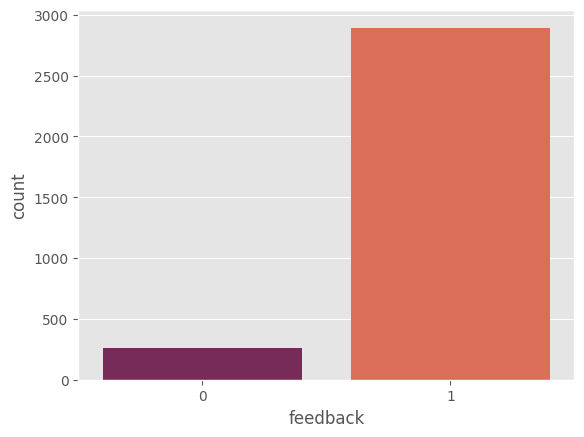

In [23]:
sns.countplot(x='feedback', data =df,palette='rocket') # Replace rocket with a string that represents a valid palette name.
plt.show()

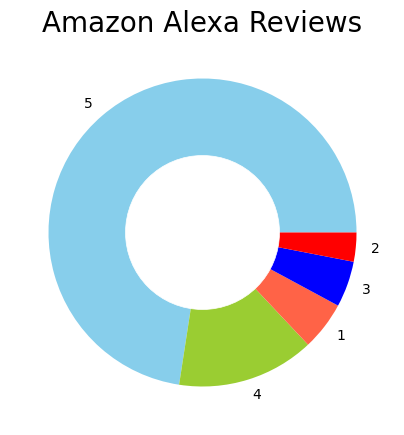

In [43]:
ratings = df["rating"].value_counts()
numbers = ratings.index
quantity = ratings.values

custom_colors = ["skyblue", "yellowgreen", 'tomato', "blue", "red"]
plt.figure(figsize=(5, 5))
plt.pie(quantity, labels=numbers, colors=custom_colors)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Amazon Alexa Reviews", fontsize=20)
plt.show()

In [45]:

import nltk
nltk.download('vader_lexicon') # Download lexicon for sentiment analysis

from nltk.sentiment.vader import SentimentIntensityAnalyzer # Import the class

sentiments = SentimentIntensityAnalyzer()
df["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in df["verified_reviews"]]
df["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in df["verified_reviews"]]
df["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in df["verified_reviews"]]
print(df.head())


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


   rating       date         variation  \
0       5  31-Jul-18  Charcoal Fabric    
1       5  31-Jul-18  Charcoal Fabric    
2       4  31-Jul-18    Walnut Finish    
3       5  31-Jul-18  Charcoal Fabric    
4       5  31-Jul-18  Charcoal Fabric    

                                    verified_reviews  feedback  Positive  \
0                                          love echo         1     0.808   
1                                              loved         1     1.000   
2  sometimes playing game answer question correct...         1     0.201   
3  lot fun thing 4 yr old learns dinosaurs contro...         1     0.554   
4                                              music         1     0.000   

   Negative  Neutral  
0     0.000    0.192  
1     0.000    0.000  
2     0.145    0.654  
3     0.000    0.446  
4     0.000    1.000  


In [47]:
x = sum(df["Positive"])
y = sum(df["Negative"])
z = sum(df["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)

Neutral 🙂 


In [48]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  1410.0230000000001
Negative:  126.29399999999997
Neutral:  1525.6899999999957


So we can see that Positive and Neutral are above 1000 where Negative is below 100. So this means that most of the customers of Amazon Alexa are satisfied with its services.

In [24]:
for i in range(5):
    print(df['verified_reviews'].iloc[i],"\n")

Love my Echo! 

Loved it! 

Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home. 

I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well. 

Music 



In [28]:
import nltk
nltk.download('punkt')

def data_processing(text):
    if isinstance(text, str):  # Check if text is a string
        text = text.lower()
        text = re.sub(r"http\S+www\S+|https\S+", '', text, flags=re.MULTILINE)
        text = re.sub(r'[^\w\s]', '', text)
        text_tokens = word_tokenize(text)
        filtered_text = [w for w in text_tokens if not w in stop_words]
        return " ".join(filtered_text)
    else:
        return ""  # Return empty string for non-string values

df.verified_reviews = df['verified_reviews'].apply(data_processing)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [29]:
import nltk
nltk.download('punkt')
df.verified_reviews = df['verified_reviews'].apply(data_processing)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [30]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

df['verified_reviews'] = df['verified_reviews'].apply(lambda x: stemming(x))

for i in range(5):
    print(df['verified_reviews'].iloc[i],"\n")

love echo 

loved 

sometimes playing game answer question correctly alexa says got wrong answers like able turn lights away home 

lot fun thing 4 yr old learns dinosaurs control lights play games like categories nice sound playing music well 

music 



In [31]:
pos_reviews = df[df.feedback == 1]
pos_reviews.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,love echo,1
1,5,31-Jul-18,Charcoal Fabric,loved,1
2,4,31-Jul-18,Walnut Finish,sometimes playing game answer question correct...,1
3,5,31-Jul-18,Charcoal Fabric,lot fun thing 4 yr old learns dinosaurs contro...,1
4,5,31-Jul-18,Charcoal Fabric,music,1


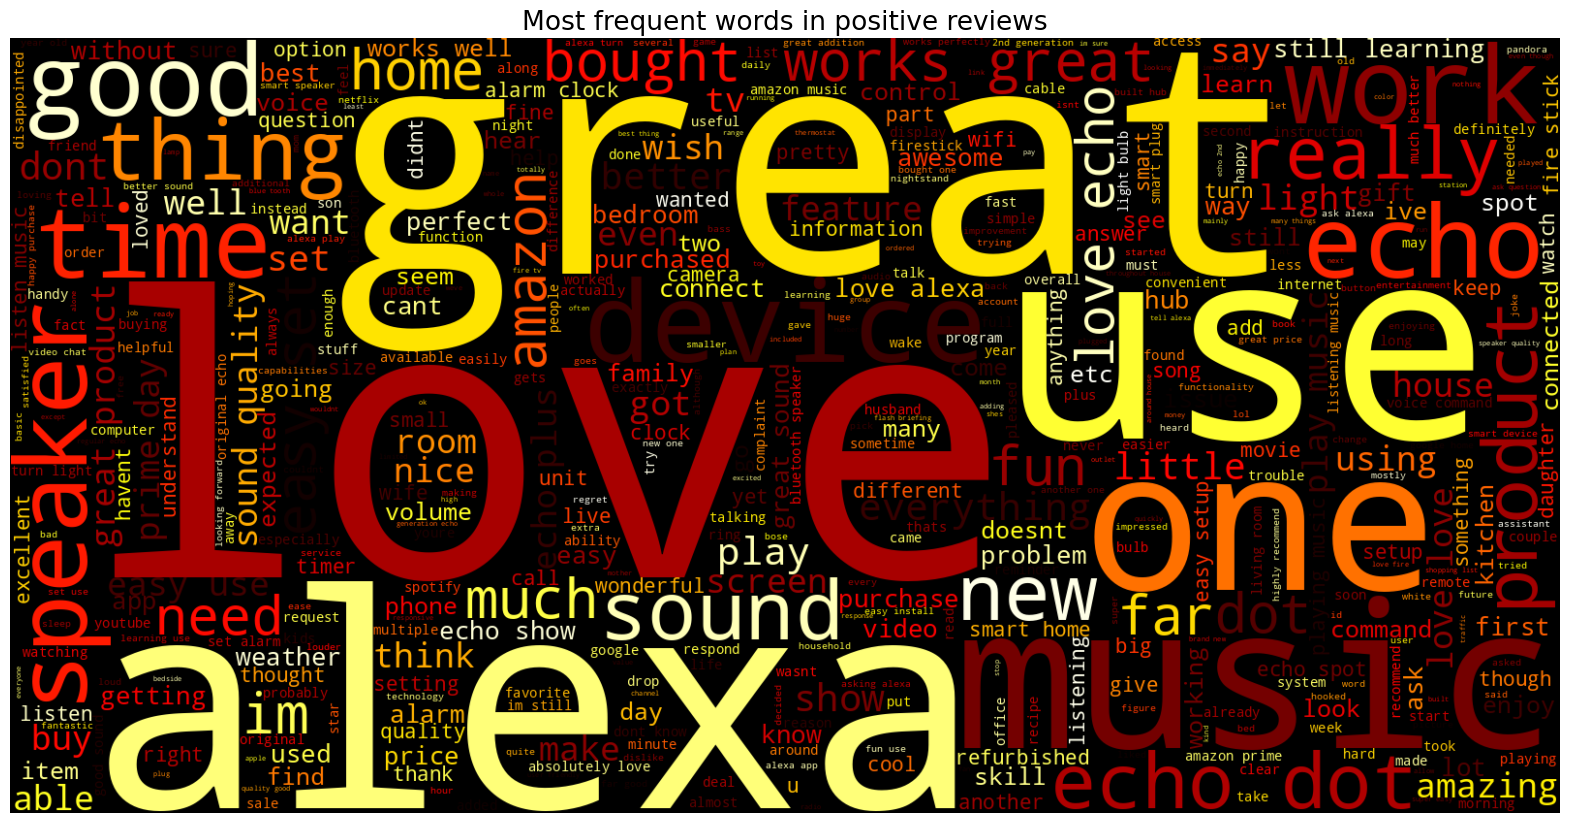

In [54]:
text = ' '.join([word for word in pos_reviews['verified_reviews']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800, colormap='hot').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in positive reviews', fontsize=19)
plt.show()

In [33]:
neg_reviews = df[df.feedback==0]
neg_reviews.head()

,rating,date,variation,verified_reviews,feedback
46,2,30-Jul-18,Charcoal Fabric,like siri fact siri answers accurately alexa d...,0
111,2,30-Jul-18,Charcoal Fabric,sound terrible u want good music get bose,0
141,1,30-Jul-18,Charcoal Fabric,much features,0
162,1,30-Jul-18,Sandstone Fabric,stopped working 2 weeks didnt follow commands ...,0
176,2,30-Jul-18,Heather Gray Fabric,sad joke worthless,0


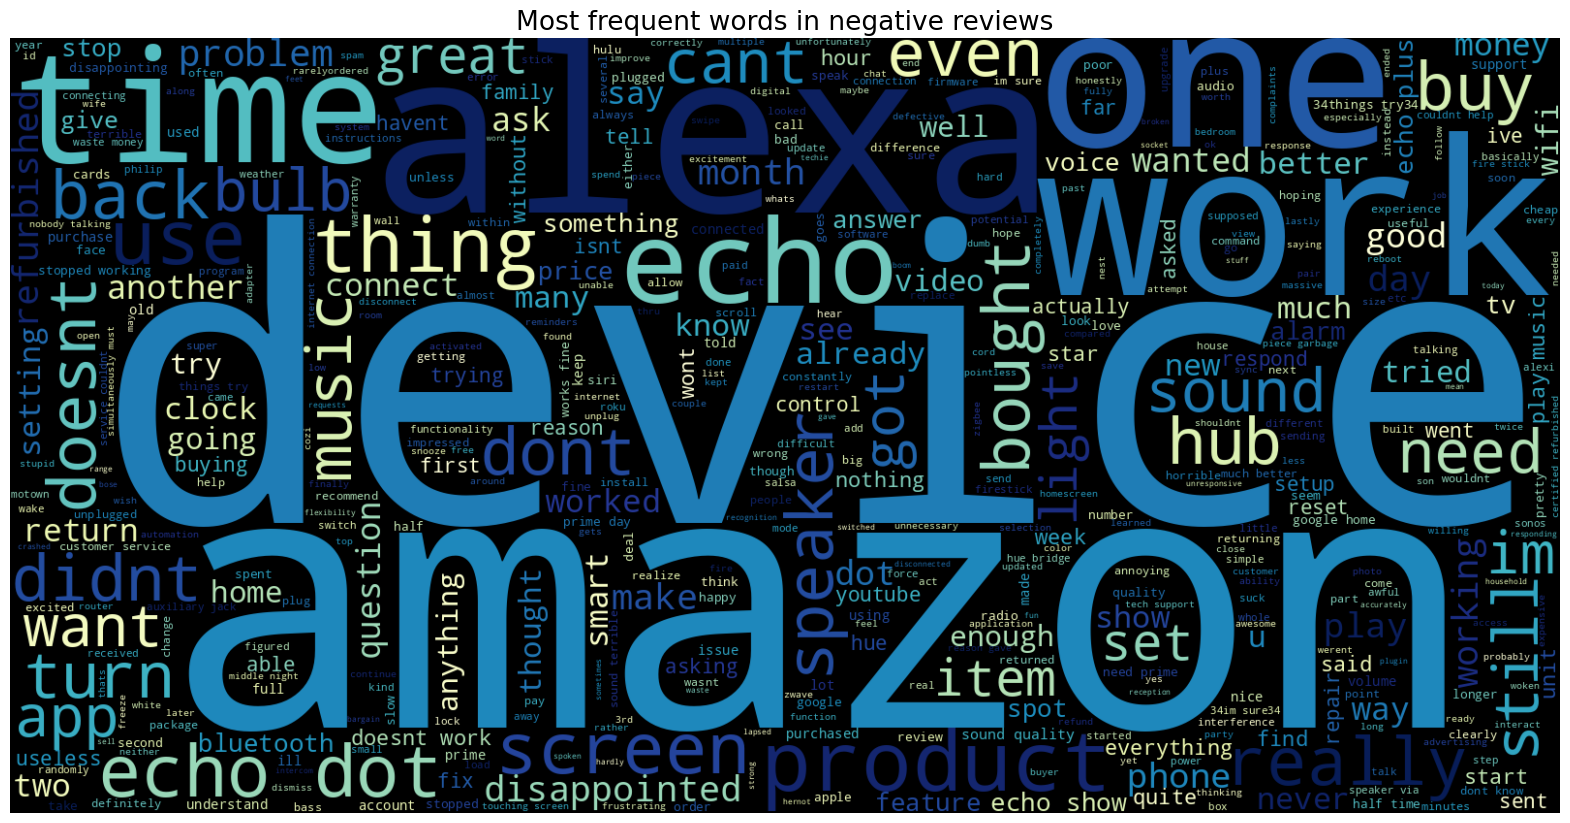

In [52]:
text = ' '.join([word for word in neg_reviews['verified_reviews']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800, colormap='YlGnBu').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in negative reviews', fontsize=19)
plt.show()

In [35]:
X = df['verified_reviews']
Y = df['feedback']

In [36]:
cv = CountVectorizer()
X = cv.fit_transform(df['verified_reviews'])

In [37]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [38]:
print("Size of x_train: ",(x_train.shape))
print("Size of y_train: ",(y_train.shape))
print("Size of x_test: ",(x_test.shape))
print("Size of y_test: ",(y_test.shape))

Size of x_train:  (2520, 4364)
Size of y_train:  (2520,)
Size of x_test:  (630, 4364)
Size of y_test:  (630,)


In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 93.65%


In [40]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

[[ 21  37]
 [  3 569]]


              precision    recall  f1-score   support

           0       0.88      0.36      0.51        58
           1       0.94      0.99      0.97       572

    accuracy                           0.94       630
   macro avg       0.91      0.68      0.74       630
weighted avg       0.93      0.94      0.92       630



In [41]:
mnb = MultinomialNB()
mnb.fit(x_train, y_train)
mnb_pred = mnb.predict(x_test)
mnb_acc = accuracy_score(mnb_pred, y_test)
print("Test accuracy: {:.2f}%".format(mnb_acc*100))

print(confusion_matrix(y_test, mnb_pred))
print("\n")
print(classification_report(y_test, mnb_pred))

Test accuracy: 92.22%
[[ 15  43]
 [  6 566]]


              precision    recall  f1-score   support

           0       0.71      0.26      0.38        58
           1       0.93      0.99      0.96       572

    accuracy                           0.92       630
   macro avg       0.82      0.62      0.67       630
weighted avg       0.91      0.92      0.91       630



In [56]:


from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train, y_train)
svm_pred = svm.predict(x_test)
svm_acc = accuracy_score(svm_pred, y_test)
print("Test accuracy: {:.2f}%".format(svm_acc*100))

print(confusion_matrix(y_test, svm_pred))
print("\n")
print(classification_report(y_test, svm_pred))


Test accuracy: 91.75%
[[  6  52]
 [  0 572]]


              precision    recall  f1-score   support

           0       1.00      0.10      0.19        58
           1       0.92      1.00      0.96       572

    accuracy                           0.92       630
   macro avg       0.96      0.55      0.57       630
weighted avg       0.92      0.92      0.89       630



In [57]:

# Add more code here, for example, hyperparameter tuning or cross-validation
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for Logistic Regression
param_grid = {'C': [0.1, 1, 10]}
grid_search = GridSearchCV(logreg, param_grid, cv=5)
grid_search.fit(x_train, y_train)

print("Best parameters for Logistic Regression:", grid_search.best_params_)
print("Best cross-validation score for Logistic Regression:", grid_search.best_score_)

# Hyperparameter tuning for Multinomial Naive Bayes
param_grid = {'alpha': [0.1, 1, 10]}
grid_search = GridSearchCV(mnb, param_grid, cv=5)
grid_search.fit(x_train, y_train)

print("Best parameters for Multinomial Naive Bayes:", grid_search.best_params_)
print("Best cross-validation score for Multinomial Naive Bayes:", grid_search.best_score_)

# Hyperparameter tuning for Support Vector Machine
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
grid_search = GridSearchCV(svm, param_grid, cv=5)
grid_search.fit(x_train, y_train)

print("Best parameters for Support Vector Machine:", grid_search.best_params_)
print("Best cross-validation score for Support Vector Machine:", grid_search.best_score_)


Best parameters for Logistic Regression: {'C': 1}
Best cross-validation score for Logistic Regression: 0.9365079365079365
Best parameters for Multinomial Naive Bayes: {'alpha': 1}
Best cross-validation score for Multinomial Naive Bayes: 0.932936507936508
Best parameters for Support Vector Machine: {'C': 0.1, 'kernel': 'linear'}
Best cross-validation score for Support Vector Machine: 0.934126984126984


In [58]:


# Model Evaluation and Comparison
models = [
    ('Logistic Regression', logreg, logreg_pred),
    ('Multinomial Naive Bayes', mnb, mnb_pred),
    ('Support Vector Machine', svm, svm_pred)
]

for name, model, pred in models:
    print(f"--- {name} ---")
    print("Accuracy: {:.2f}%".format(accuracy_score(pred, y_test) * 100))
    print("Confusion Matrix:\n", confusion_matrix(y_test, pred))
    print("Classification Report:\n", classification_report(y_test, pred))
    print("\n")

# Choose the best model based on evaluation metrics (e.g., accuracy, F1-score)
# ... (your code to select the best model)

# Example: Assuming Logistic Regression is the best model
best_model = logreg

# Save the best model for future use
import joblib
joblib.dump(best_model, 'best_sentiment_model.pkl')

# Load the saved model
loaded_model = joblib.load('best_sentiment_model.pkl')

# Use the loaded model for prediction on new data
# ... (your code to preprocess new data and use the loaded model for prediction)

# Conclusion and Future Work
# Summarize the findings and insights from the analysis.
# Suggest potential improvements or future directions for the project.


--- Logistic Regression ---
Accuracy: 93.65%
Confusion Matrix:
 [[ 21  37]
 [  3 569]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.36      0.51        58
           1       0.94      0.99      0.97       572

    accuracy                           0.94       630
   macro avg       0.91      0.68      0.74       630
weighted avg       0.93      0.94      0.92       630



--- Multinomial Naive Bayes ---
Accuracy: 92.22%
Confusion Matrix:
 [[ 15  43]
 [  6 566]]
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.26      0.38        58
           1       0.93      0.99      0.96       572

    accuracy                           0.92       630
   macro avg       0.82      0.62      0.67       630
weighted avg       0.91      0.92      0.91       630



--- Support Vector Machine ---
Accuracy: 91.75%
Confusion Matrix:
 [[  6  52]
 [  0 572]]
Classification Report:
   

--- Logistic Regression ---
Accuracy: 93.65%


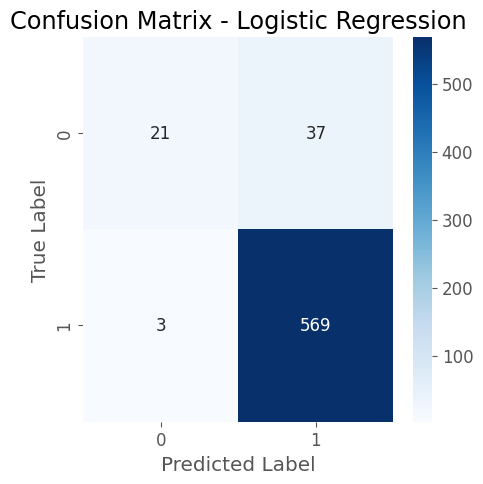

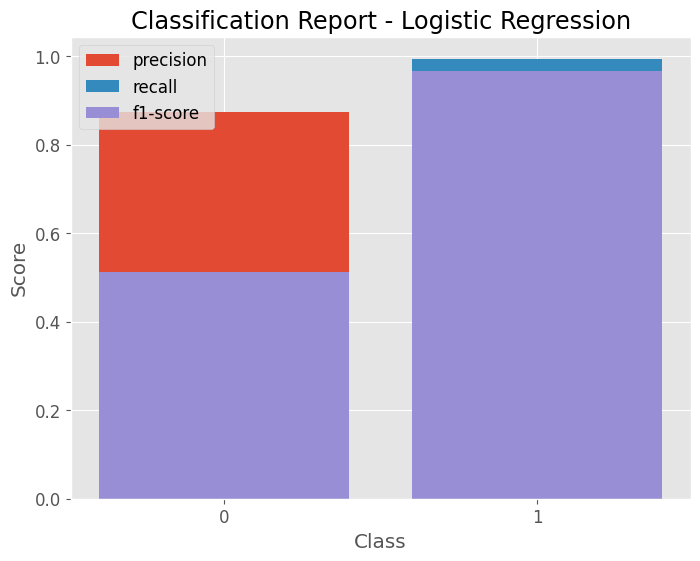



--- Multinomial Naive Bayes ---
Accuracy: 92.22%


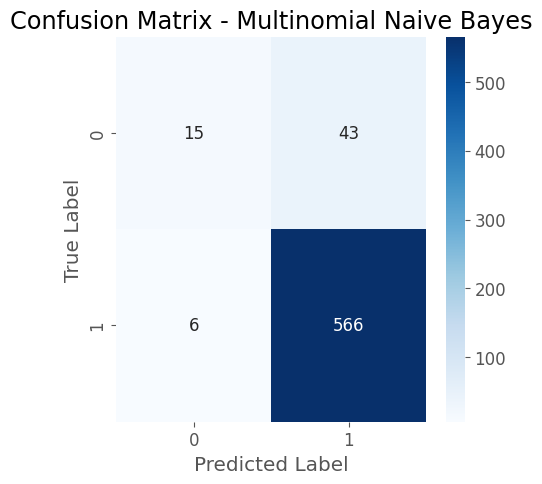

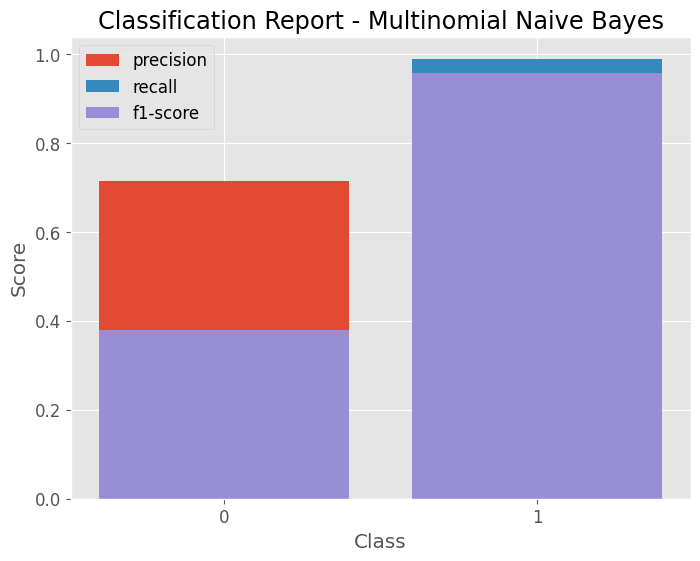



--- Support Vector Machine ---
Accuracy: 91.75%


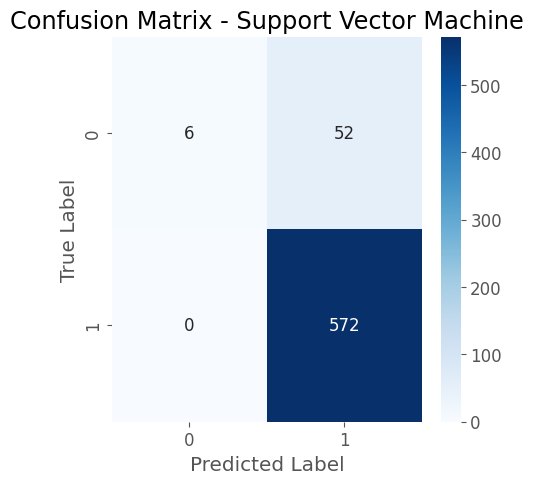

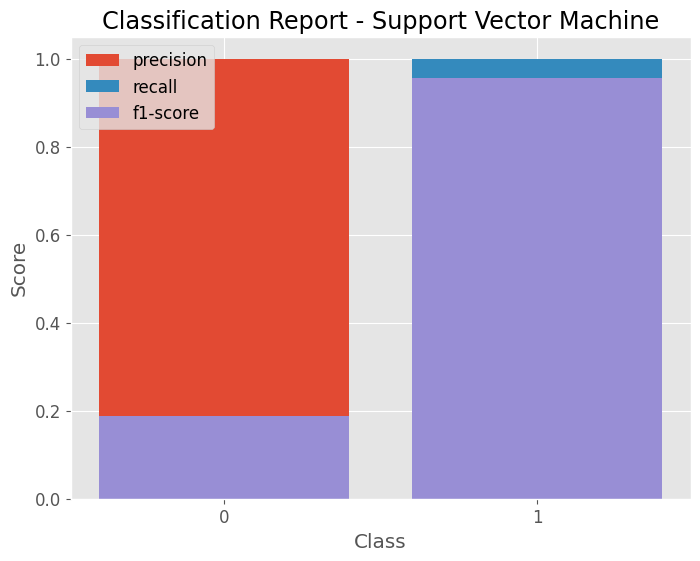

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming you have already defined logreg, mnb, svm, and their predictions
models = [
    ('Logistic Regression', logreg, logreg_pred),
    ('Multinomial Naive Bayes', mnb, mnb_pred),
    ('Support Vector Machine', svm, svm_pred)
]

for name, model, pred in models:
    print(f"--- {name} ---")
    print("Accuracy: {:.2f}%".format(accuracy_score(y_test, pred) * 100))

    # Confusion Matrix Visualization
    cm = confusion_matrix(y_test, pred)
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # Classification Report Visualization (Bar Chart)
    report = classification_report(y_test, pred, output_dict=True)
    metrics = ['precision', 'recall', 'f1-score']
    classes = list(report.keys())[:-3]  # Exclude 'accuracy', 'macro avg', 'weighted avg'

    plt.figure(figsize=(8, 6))
    for metric in metrics:
        scores = [report[class_][metric] for class_ in classes]
        plt.bar(classes, scores, label=metric)

    plt.xlabel('Class')
    plt.ylabel('Score')
    plt.title(f'Classification Report - {name}')
    plt.legend()
    plt.show()

    print("\n")
